## We want to compare the performance of boys and girls among different indicators using the mean value from 2000 to 2015. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv("pisa.csv")
df.head()

,"""LOCATION""",INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,PISAREAD,BOY,MEANSCORE,A,2000,513.00
1,AUS,PISAREAD,BOY,MEANSCORE,A,2003,506.00
2,AUS,PISAREAD,BOY,MEANSCORE,A,2006,495.00
3,AUS,PISAREAD,BOY,MEANSCORE,A,2009,496.00
4,AUS,PISAREAD,BOY,MEANSCORE,A,2012,495.09


In [4]:
# extract all columns except for 'MEASURE' and 'FREQUENCY'
df = df.iloc[:, [0, 1, 2, 5, 6]]
# get rid of rows with 'TOT' subject
df = df[df['SUBJECT'] != "TOT"]

# get list of variable categories of indicator and location
indicators = list(df["INDICATOR"].unique())
locations = list(df['"LOCATION"'].unique())

df.head()

,"""LOCATION""",INDICATOR,SUBJECT,TIME,Value
0,AUS,PISAREAD,BOY,2000,513.00
1,AUS,PISAREAD,BOY,2003,506.00
2,AUS,PISAREAD,BOY,2006,495.00
3,AUS,PISAREAD,BOY,2009,496.00
4,AUS,PISAREAD,BOY,2012,495.09


In [5]:
boy_mean = []
girl_mean = []
locs = []
indis = []
diff = []
for i in range(len(indicators)):
    # extract rows with same indicator
    indicator_df = df[df["INDICATOR"] == indicators[i]]
    
    d = {}
    for location in locations:
        # extract rows of each location, then group all rows by 'subject'
        # calculate mean value over years for different subject
        # map mean_value to subject in a sub-dictionary
        # map every sub-dictionary for different location to each location
        d[location] = indicator_df[indicator_df['"LOCATION"'] == location].groupby("SUBJECT")["Value"].mean().to_dict()
    
    # loop through dictionary to get lists of boys' average performance and girls'
    
    for loc, subj_perform in d.items():
        indis.append(indicators[i])
        locs.append(loc)
        for subj, perform in subj_perform.items():
            if subj == "BOY":
                boy_mean.append(perform)
            else:
                girl_mean.append(perform)

for i in range(len(boy_mean)):
    diff.append(abs(boy_mean[i] - girl_mean[i]))
                
# create a new data frame with 4 columns: indicator, location, boy's mean_value & girl's mean_value
location_value = pd.DataFrame({"INDICATOR": indis, "LOCATION": locs, "BOY": boy_mean, "GIRL": girl_mean, "DIFF": diff})

location_value.head()

,INDICATOR,LOCATION,BOY,GIRL,DIFF
0,PISAREAD,AUS,498.681667,534.090333,35.408667
1,PISAREAD,AUT,471.418600,507.804200,36.385600
2,PISAREAD,BEL,489.959167,520.767000,30.807833
3,PISAREAD,CAN,511.752000,543.776167,32.024167
4,PISAREAD,CZE,468.997167,506.798333,37.801167


Text(0.15,0.1,'p-value: 0.8278040646167406')

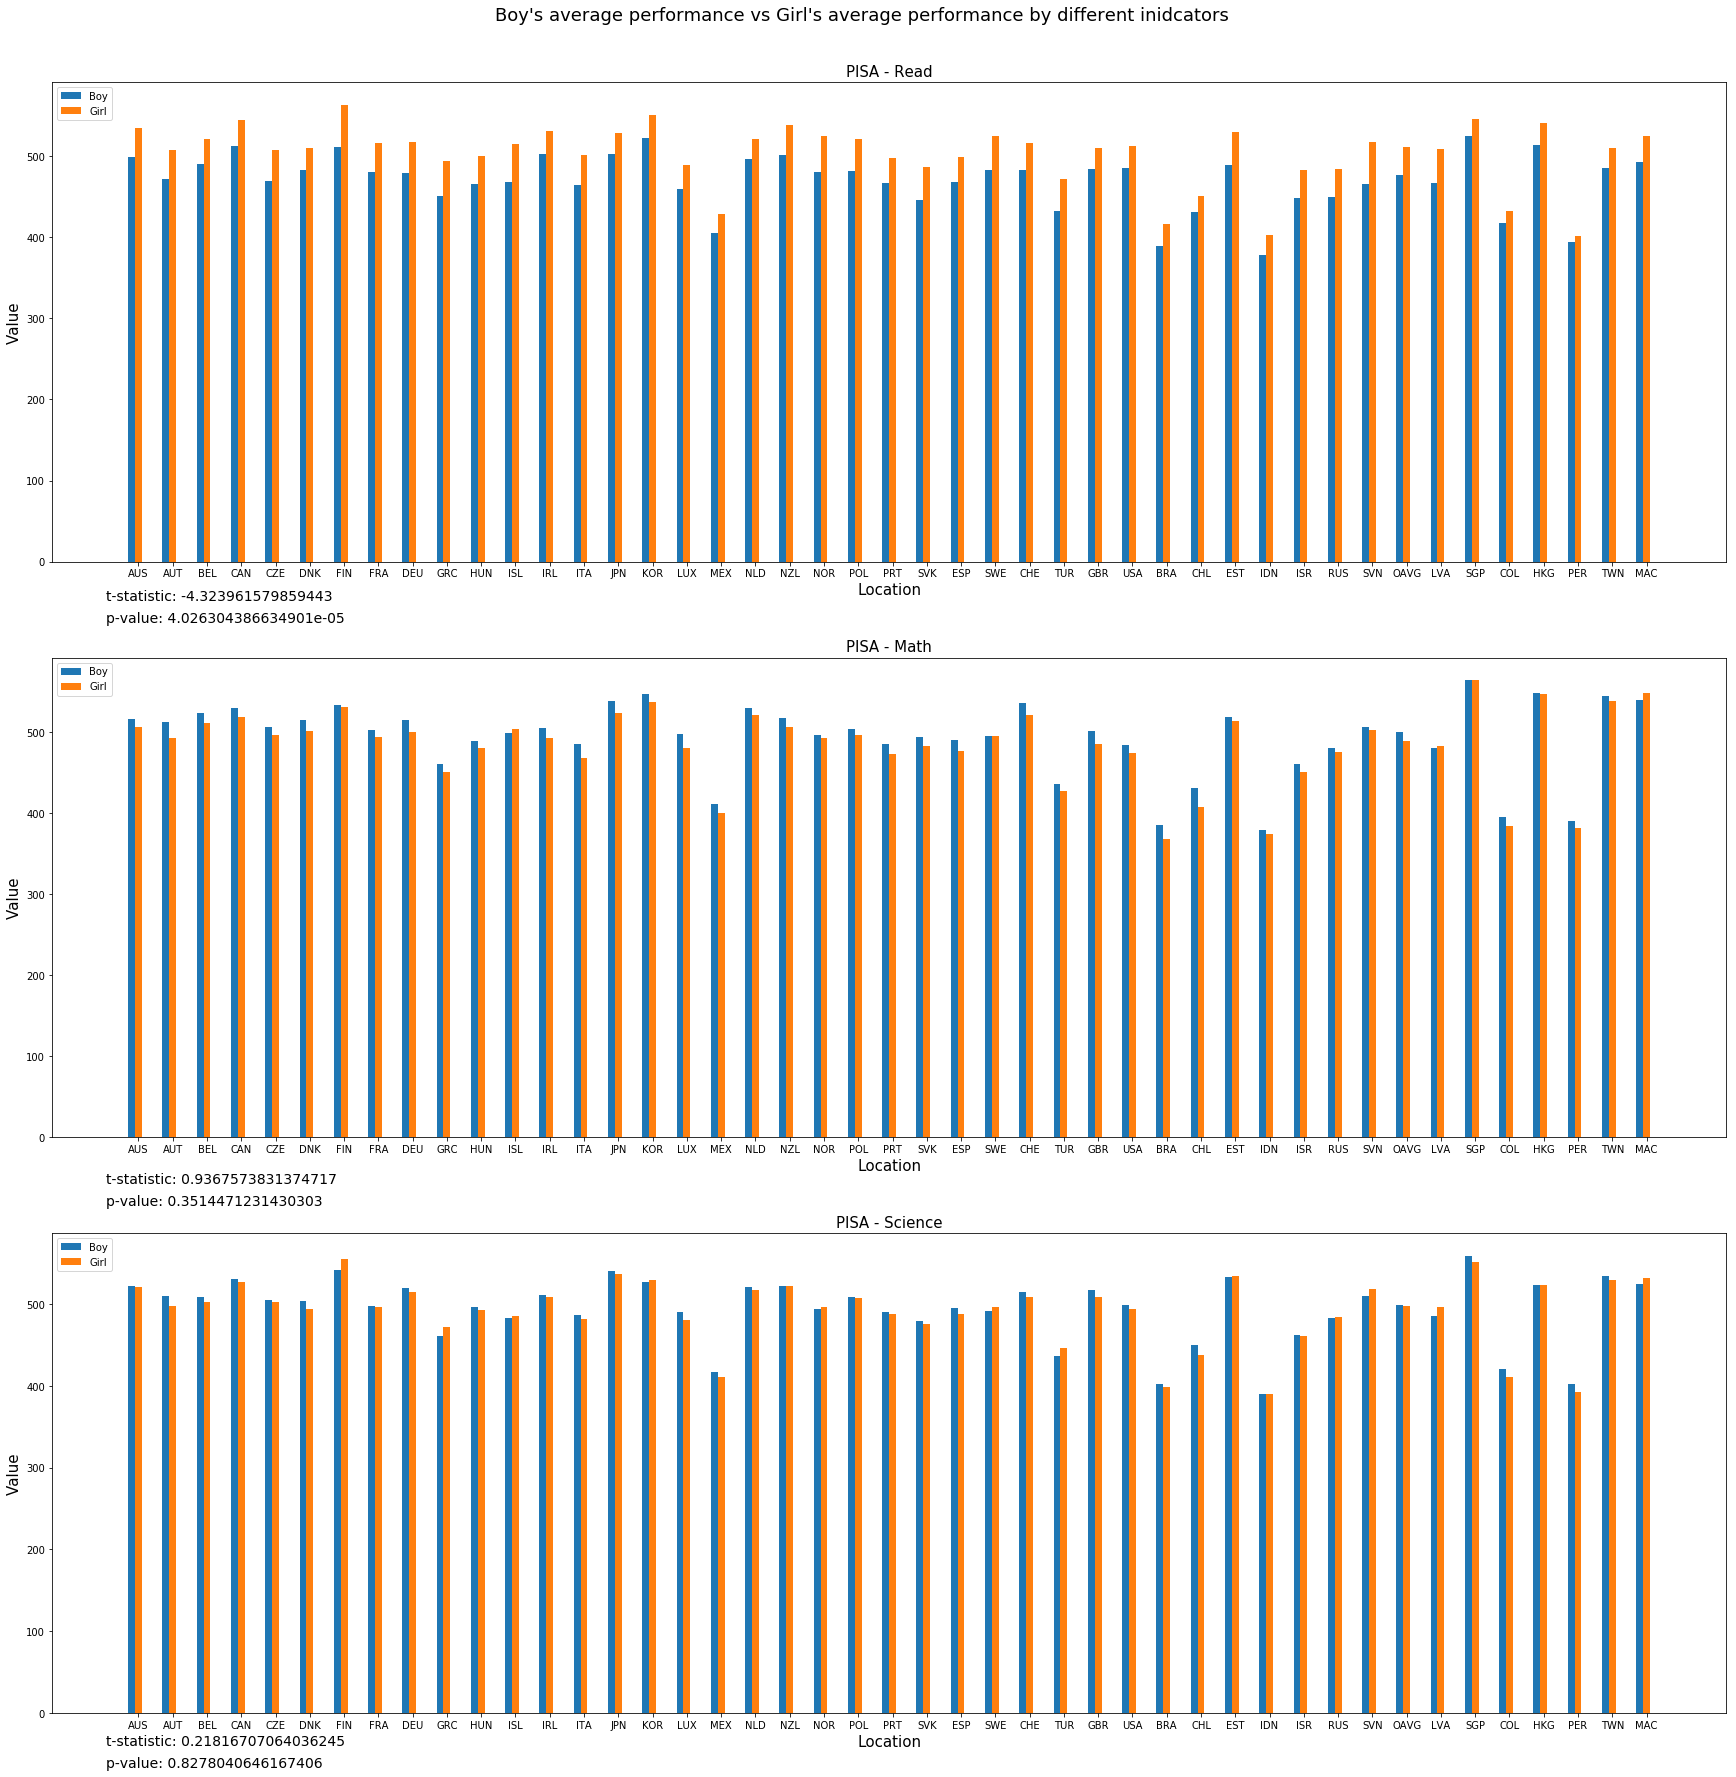

In [6]:
fig = plt.figure(figsize = (30, 30))
titles = ["PISA - Read", "PISA - Math", "PISA - Science"] # titles of 3 subplots
t_list = []
p_list = []
for i in range(len(indicators)):
    # extract rows with same indicator
    indicator_df = location_value[location_value["INDICATOR"] == indicators[i]]
    
    x = indicator_df["LOCATION"]
    y1 = indicator_df["BOY"]
    y2 = indicator_df["GIRL"]
    x0 = list(range(len(locations)))
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    ax.bar(x0, y1, width = 0.2, label = "Boy")
    for j in range(len(x0)):
        x0[j] += 0.2
    ax.bar(x0, y2, width = 0.2, label = "Girl", tick_label = x)
    ax.set_xlabel("Location", fontsize = 15)
    ax.set_ylabel("Value", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    
    (t_stats, p_value) = stats.ttest_ind(y1, y2)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Boy's average performance vs Girl's average performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)

We want to figure out whether there is a connection between the difference of between boys and girls & the overall performance of location. We manually set the high performance level to be 500 and low performance level to be 450.  

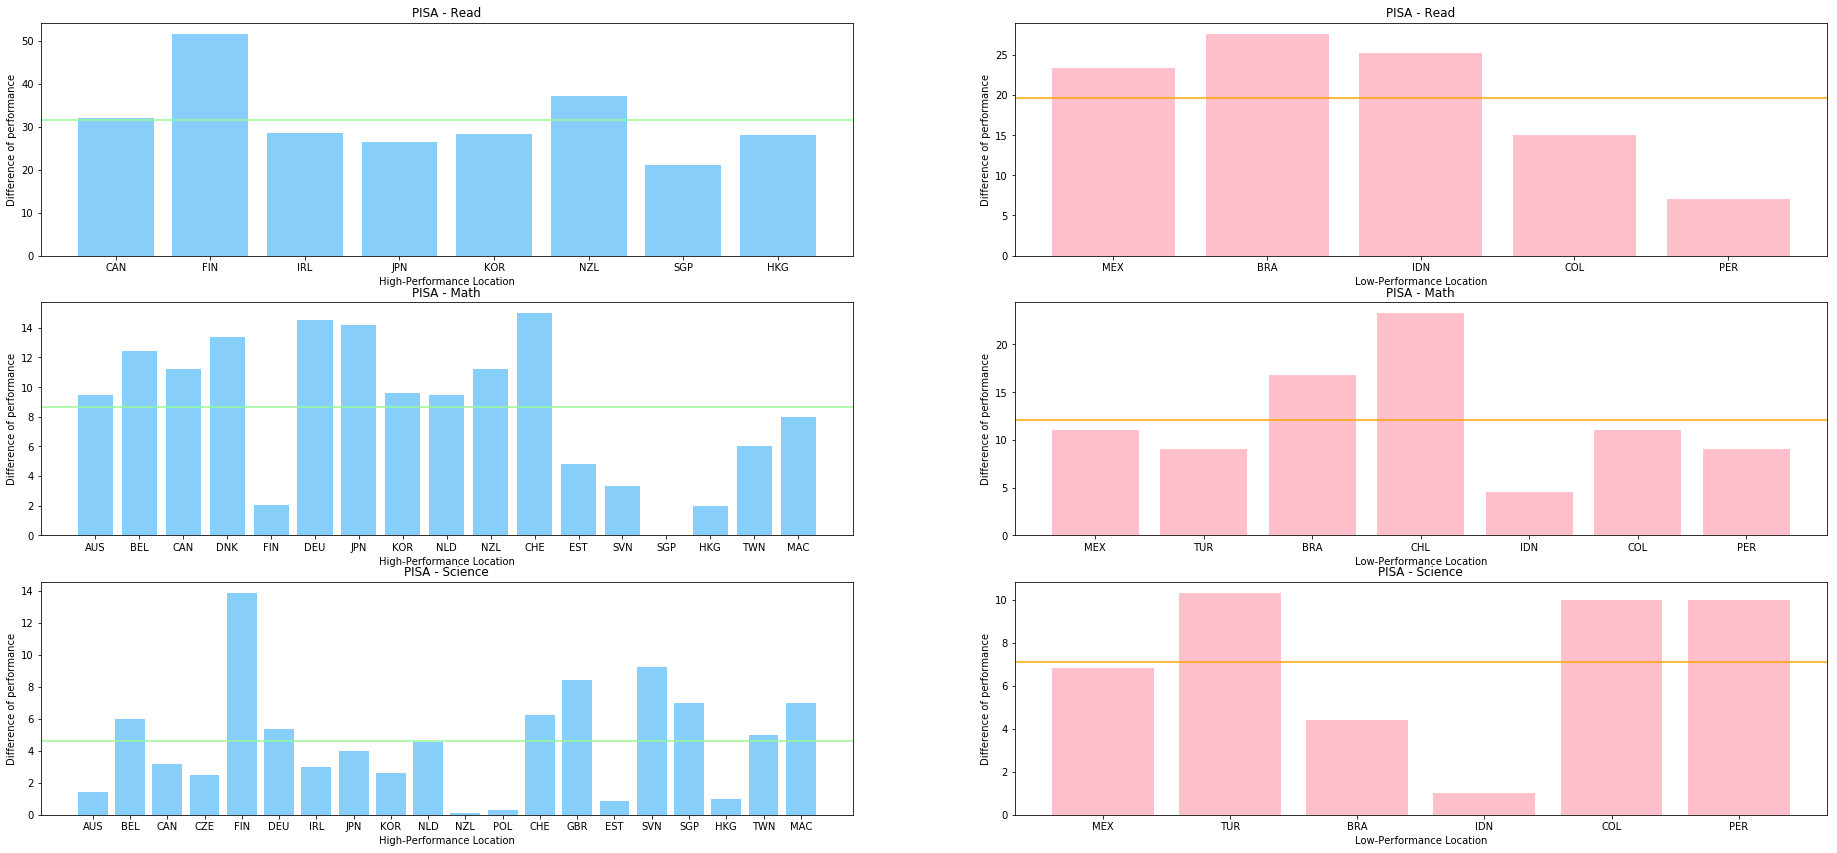

In [18]:
fig = plt.figure(figsize = (32, 30))
titles = ["PISA - Read", "PISA - Math", "PISA - Science"] # titles of 3 subplots
for i in range(len(indicators)):
    # extract rows with same indicator
    indicator_df = location_value[location_value["INDICATOR"] == indicators[i]]
    
    # get high performance locations
    high_perf = indicator_df[indicator_df["BOY"] >= 500]
    high_perf = high_perf[high_perf["GIRL"] >= 500]
    
    # get low performance locations
    low_perf = indicator_df[indicator_df["BOY"] <= 450]
    low_perf = low_perf[low_perf["GIRL"] <= 450]
    
    # draw 6 subplots in 3 rows & 2 columns
    ax1 = fig.add_subplot(6, 2, 2*i + 1)
    x1 = high_perf['LOCATION']
    y1 = high_perf["DIFF"]
    ax1.bar(x1, y1, color = 'lightskyblue')
    plt.axhline(np.mean(y1), color = "palegreen")
    ax1.set_title(titles[i])
    ax1.set_xlabel("High-Performance Location")
    ax1.set_ylabel("Difference of performance")
    
    ax2 = fig.add_subplot(6, 2, 2 * (i + 1))
    x2 = low_perf['LOCATION']
    y2 = low_perf["DIFF"]
    ax2.bar(x2, y2, color = 'pink')
    plt.axhline(np.mean(y2), color = "orange")
    ax2.set_title(titles[i])
    ax2.set_xlabel("Low-Performance Location")
    ax2.set_ylabel("Difference of performance")
    